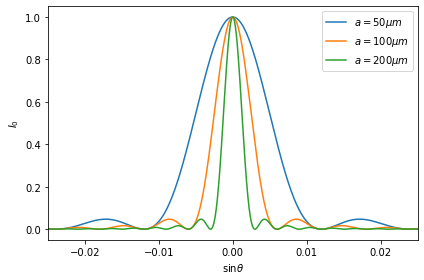

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Model input parameters:
w = 0.6 # light wavelength [micron]
a = 50 # slit width [micron]
d = 250 # slit spacing [micron]
N = 1 # number of slits

if N > 1 and d < a:
    raise ValueError("Invalid parameters: slit spacing must be larger than slit width")

# model diffraction up to this angle [radians]
max_angle = np.deg2rad(5)
# theta - angle of incidence
theta = np.linspace(-max_angle, max_angle, 10000)
#theta = np.linspace(-np.pi/50, np.pi/50, 10000)

def slit_intensity(a, w, theta):
    """
    Return the normalised intensity of Fraunhofer diffraction on a slit.
    a: slit width [micron]
    w: light wavelength [micron]
    theta: angle between the direction of light and the normal to the slit plane.
    """
    # diffraction pattern from one slit
    alpha = np.pi * a / w * np.sin(theta)
    # 
    I = (np.sin(alpha) / alpha)**2
    # treat singularity at alpha == 0 specially:
    ii = abs(alpha) < 1e-5
    if any(ii):
        I[ii] = 1.0
    return I

def grating_interference(d, N, w, theta):
    """
    Return the normalised intensity of Fraunhofer diffraction on an array of delta-function slits.
    d: slit spacing, centre-to-centre [micron]
    N: number of slits
    w: light wavelength [micron]
    theta: angle between the direction of light and the normal to the slit plane.
    """
    # diffraction pattern from an array of slits
    beta = np.pi * d / w * np.sin(theta)
    I = (np.sin(N*beta) / N / np.sin(beta))**2
    # treat singularities at sin(beta) == 0 specially:
    ii = abs(np.sin(beta)) < 1e-5
    if any(ii):
        I[ii] = N**2
    return I

def grating_intensity(a, d, N, w, theta):
    """
    Return the normalised intensity of Fraunhofer diffraction on an array of slits.
    a: slit width [micron]
    d: slit spacing, centre-to-centre [micron]
    N: number of slits
    w: light wavelength [micron]
    theta: angle between the direction of light and the normal to the slit plane.
    """
    return slit_intensity(a, w, theta) * grating_interference(d, N, w, theta)
    
# Plot the interference pattern
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r'$\sin\theta$')
ax.set_ylabel(r'$I_0$')
ax.plot(np.sin(theta), grating_intensity(50, d, N, w, theta), '-', label='$a=50\mu m$')
ax.plot(np.sin(theta), grating_intensity(100, d, N, w, theta), '-', label='$a=100\mu m$')
ax.plot(np.sin(theta), grating_intensity(200, d, N, w, theta), '-', label='$a=200\mu m$')
plt.xlim([-0.025, 0.025])
ax.legend()
    
plt.tight_layout()
plt.show()


In [3]:
from scipy.optimize import curve_fit
from scipy.stats import chi2
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

# Define fit

Wavelength = 6.238e-7
L = 1.66

def fit(n, dt, *vars):
    a, = vars
    return L*( (Wavelength/a)*n)

# Define datasets

n1 = np.array([-4,   -3,   -2,    -1,   1,    2,   3,   4])
x1 = np.array([-6.3, -4.6, -3.15, -1.5, 1.75, 3.3, 5.0, 6.7])
s1 = np.array([0.1,  0.1,  0.05,  0.05, 0.05, 0.05,0.1, 0.1])
dt = np.array([0.2])

n2 = np.array([-6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6])
x2 = np.array([-4.5, -3.75, -2.95, -2.25, -1.45, -0.7, 0.9, 1.6, 2.3, 3.2, 4.0, 4.75])
s2 = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
dt2 = np.array([0.1])

# Define variables

p0_1 = np.array([1e-4])
p0_2 = np.array([1e-4])

# Fit data

params_1, covariance_1 = curve_fit(fit, n1, x1, p0_1, s1, absolute_sigma=True)

# Plot fits

fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.plot(n1, fit(n1, params_1), 'r', label="first hypothesis fit")

plt.show()
print("a")


ValueError: not enough values to unpack (expected 1, got 0)